# Joe Stanley
### Stanley Solutions
Testing and modeling environment for water heating/cooling model.

References:
- http://jwilson.coe.uga.edu/EMAT6680Fa07/Lowe/Assignment%2012/CoolingWater.html
- https://sciencing.com/calculate-time-heat-water-8028611.html

In [1]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import convert_temperature as conv_temp

# Define System Parameters
k = 0.15 # From Web, not Terribly Accurate
g = 10 # Gallons in Container
P = 500

###### ALL TIME IS MEASURED IN MINUTES #####

In [35]:
# Define Modeling Functions
def gallons(liters):
    gal = liters/3.78541
    return(gal)
def liters(gallons):
    lit = gallons*3.78541
    return(lit)

def newtoncooling(t,temp0,tempenv):
    temp = tempenv + (temp0-tempenv)*np.exp(-k*t)
    return(temp)

def heating(t,Power,temp0):
    temp0 = conv_temp(temp0,'f','c')
    Pkw = Power/1000
    temp = temp0 + (60*Pkw*t)/(4.2*liters(g))
    temp = conv_temp(temp,'c','f')
    return(temp)

def combined(t,Power,temp0,tempenv):
    cool = newtoncooling(t,temp0,tempenv)
    heat = heating(t,Power,temp0) - temp0
    return(cool+heat)

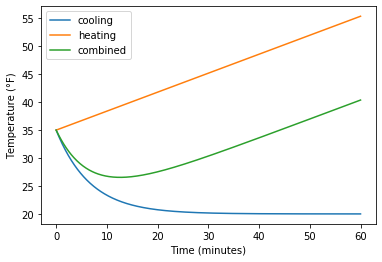

In [36]:
# Model SIMPLE Systems, Nothing Advanced
t_hr = np.linspace(0,60,600)
t0 = 35
te = 20
cool = newtoncooling(t_hr,t0,te)
heat = heating(t_hr,P,t0)
sys = combined(t_hr,P,t0,te)
plt.plot(t_hr, cool, label='cooling')
plt.plot(t_hr, heat, label='heating')
plt.plot(t_hr, sys, label='combined')
plt.xlabel("Time (minutes)")
plt.ylabel("Temperature (°F)")
plt.legend()
plt.show()

## First model was not accurate...
It did not appropriately account for time.

In [37]:
# Define Avista Billing Rates
ratelt600 = 0.08458 # $/kwh
rategt600 = 0.09521 # $/kwh

In [42]:
# Define New Temperature Model
class troughmodel():
    def __init__(self,temp0,Pwatts,volume,k,threshold=45):
        # Define Simple Heater
        self._t0 = temp0
        self._Pkw = Pwatts/1000
        self._k = k
        self._temp = [temp0]
        self._heater_en = [False]
        self._threshold = threshold
        self._volume = volume
        self._index = 0
    
    def update(self,ambient,k=None):
        if k != None:
            self._k = k
        temp = self._temp[self._index]
        # Determine Temperature Change from Both Heating and Cooling
        newTemp = ambient + (temp-ambient)*np.exp(-self._k)
        dt_heatC = (60*self._Pkw)/(4.2*liters(self._volume))
        # Convert Heating Effect back to Fahrenheit
        dt_heat = (dt_heatC*9/5)+32
        print(dt_heat)
        # Determine whether Heater should be Applied
        if temp >= self._threshold:
            self._heater_en.append(False) # Don't Heat
        else:
            self._heater_en.append(True) # Apply Heater
            newTemp += dt_heat
        # Increment Index and Return New Temperature
        self._index += 1
        self._temp.append(newTemp)
        return(newTemp)
    
    def get_temp(self):
        return(self._temp)
    
    def get_heater_state(self):
        return(self._heater_en)
    
    def shrink_lists(self):
        self._temp = self._temp[-2:]
        self._heater_en = self._heater_en[-2:]

32.33964994167456
32.33964994167456
32.33964994167456
32.33964994167456
32.33964994167456
32.33964994167456
32.33964994167456
32.33964994167456
32.33964994167456
32.33964994167456
32.33964994167456
32.33964994167456
32.33964994167456
32.33964994167456
32.33964994167456
32.33964994167456
32.33964994167456
32.33964994167456
32.33964994167456
32.33964994167456
32.33964994167456
32.33964994167456
32.33964994167456
32.33964994167456
32.33964994167456
32.33964994167456
32.33964994167456
32.33964994167456
32.33964994167456
32.33964994167456
32.33964994167456
32.33964994167456
32.33964994167456
32.33964994167456
32.33964994167456
32.33964994167456
32.33964994167456
32.33964994167456
32.33964994167456
32.33964994167456
32.33964994167456
32.33964994167456
32.33964994167456
32.33964994167456
32.33964994167456
32.33964994167456
32.33964994167456
32.33964994167456
32.33964994167456
32.33964994167456
32.33964994167456
32.33964994167456
32.33964994167456
32.33964994167456
32.33964994167456
32.3396499

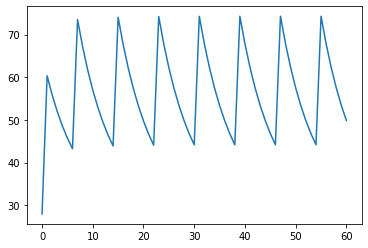

In [43]:
# Demonstrate Model in Simple System
t0 = 28

model = troughmodel(t0,P,g,k,threshold=45)

# Process 60 minutes
for _ in range(60):
    (model.update(t0))

# Display Results
plt.plot(model.get_temp(),label='water temp')
#plt.plot(model.get_heater_state,label='heater state')
plt.show()

In [34]:
liters(10)

2.6417217685798895